In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib_venn import venn2
from scipy.stats import spearmanr

In [ ]:
from sklearn.isotonic import IsotonicRegression

In [2]:
import glob
import os
from protein_conformal.util import *
from tqdm import tqdm


In [3]:
import faiss

In [4]:
scope = np.load('/data/ron/protein-conformal/data/scope_swissprot_large/db.npy')
print(scope.shape)

# load scope metadata
scope_metadata = np.load('/data/ron/protein-conformal/data/scope_swissprot_large/meta.npy')
print(len(scope_metadata))

(74, 512)
74


In [5]:
afdb = np.load('/data/ron/protein-conformal/data/afdb_swissprot_large/db.npy')
# load afdb metadata
afdb_metadata = np.load('/data/ron/protein-conformal/data/afdb_swissprot_large/meta.npy')
print(len(afdb_metadata))
print(afdb.shape)

2302899
(2302899, 512)


In [6]:
afdb_lookup = load_database(afdb)

In [7]:
# Query for the 1st nearest neighbor
k = len(afdb_metadata)
D, I = query(afdb_lookup, scope, k)

In [8]:
I.shape, D.shape

((74, 2302899), (74, 2302899))

(array([2.000000e+00, 6.000000e+00, 1.800000e+01, 5.200000e+01,
        1.550000e+02, 3.810000e+02, 6.180000e+02, 1.208000e+03,
        2.375000e+03, 5.277000e+03, 1.119100e+04, 2.233100e+04,
        4.079000e+04, 7.393900e+04, 1.297000e+05, 2.197490e+05,
        3.607110e+05, 5.800260e+05, 9.119940e+05, 1.397445e+06,
        2.083683e+06, 3.012448e+06, 4.143538e+06, 5.430403e+06,
        6.739452e+06, 7.885948e+06, 8.765665e+06, 9.313366e+06,
        9.552896e+06, 9.525349e+06, 9.259263e+06, 8.812354e+06,
        8.215056e+06, 7.526189e+06, 6.770366e+06, 6.021566e+06,
        5.317805e+06, 4.686953e+06, 4.157929e+06, 3.712709e+06,
        3.340142e+06, 3.027004e+06, 2.758963e+06, 2.525884e+06,
        2.323461e+06, 2.140391e+06, 1.974766e+06, 1.818283e+06,
        1.674045e+06, 1.531742e+06, 1.398477e+06, 1.277042e+06,
        1.161739e+06, 1.053199e+06, 9.505200e+05, 8.537420e+05,
        7.616410e+05, 6.710210e+05, 5.889680e+05, 5.100900e+05,
        4.367680e+05, 3.736750e+05, 3.15

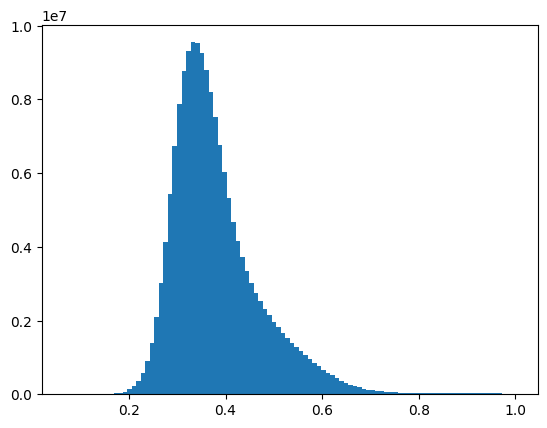

In [10]:
# plot histogram of distances
plt.hist(D.flatten(), bins=100)

## Load DALI results

In [9]:
# load all csvs into a single dataframe from /data/ron/protein-conformal/data/dali_multidomain_results_csv_small
# Get a list of all CSV files in the directory
csv_files = glob.glob('/data/ron/protein-conformal/data/dali_multidomain_results_csv_small/*.csv')

# Read each CSV file into a DataFrame and store all DataFrames in a dictionary where the key is the filename
dfs_dali = {os.path.splitext(os.path.basename(file))[0]: pd.read_csv(file) for file in csv_files}


In [10]:

# sort the dataframes by Z-score
for key in dfs_dali.keys():
    dfs_dali[key] = dfs_dali[key].sort_values(by='Z', ascending=False)


In [11]:
dfs_dali.keys()

dict_keys(['1u7lA', '3aa0A', '3nuhB', '1cc1L', '1srqA', '4ogcA', '1xqbA', '1sg6A', '2btvA', '2i06A', '1lfpA', '1a4eA', '1h5wA', '1et0A', '2avuE', '2i5hA', '2gafD', '1gnlA', '1nh1A', '1k9oI', '3nwaA', '4ckkA', '2ffjA', '1d3yA', '1vddA', '2hhvA', '1r6fA', '1kyqA', '3cw9A', '1szqA', '1ka1A', '2yzsA', '4an8A', '2hq2A', '1mw9X', '1vkyA', '1k8tA', '1dd9A', '2azeA', '1u8vA', '1urjA', '2oezA', '1no7A', '4dynA', '1ldjA', '1m1cA', '1io1A', '2b3tB', '3vb9A', '2o3iA', '2ijrA', '4wsbC', '2p62A', '1z0sA', '1q88A', '2dcfA', '1cc1S', '1knzA', '1x87A', '3jclA', '1twfB', '1fvhA', '3rlfF', '1zbpA', '1sr8A', '1zjcA', '1i2aA', '5d9aA', '2fiyA', '5id6A', '2i0zA', '2i71A', '1oisA'])

In [12]:
# Concatenate all DataFrames into a single DataFrame
df_dali = pd.concat(dfs_dali.values(), ignore_index=True)

In [13]:
df_dali.shape

(8885524, 10)

In [14]:
df_dali.head()

,query,target,Z,RMSD,Alignment_Length,Hit_Length,Query_Length,Perc_Ident,Query_Cov_Perc,Alphafold_link
0,1u7lA,A0A3M7M387,33.7,2.8,351,986,1000,40,35.1,https://alphafold.ebi.ac.uk/entry/A0A3M7M387
1,1u7lA,A0A1I8IVF7,32.7,1.9,348,1196,1000,34,34.8,https://alphafold.ebi.ac.uk/entry/A0A1I8IVF7
2,1u7lA,A0A2P6TTK6,30.6,2.4,342,367,1000,31,34.2,https://alphafold.ebi.ac.uk/entry/A0A2P6TTK6
3,1u7lA,A0A834ZDD4,30.2,3.3,349,747,1000,34,34.9,https://alphafold.ebi.ac.uk/entry/A0A834ZDD4
4,1u7lA,A0A7S1A0D8,29.9,3.7,347,437,1000,27,34.7,https://alphafold.ebi.ac.uk/entry/A0A7S1A0D8


In [15]:
df_dali['Z'].describe()

count    8.885524e+06
mean     3.026714e+00
std      1.069181e+00
min      2.000000e+00
25%      2.300000e+00
50%      2.800000e+00
75%      3.400000e+00
max      5.680000e+01
Name: Z, dtype: float64

<AxesSubplot:>

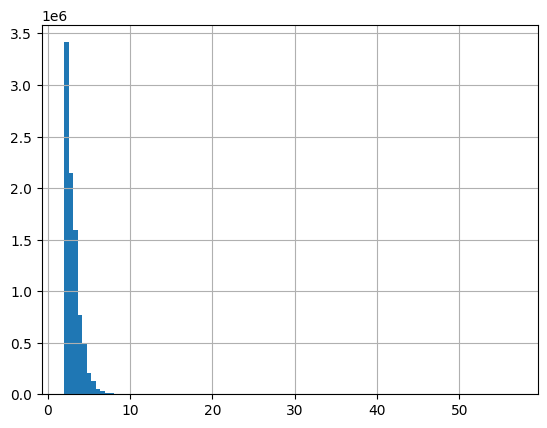

In [16]:
df_dali['Z'].hist(bins=100)

In [50]:
# Create a dictionary where the keys are the elements of afdb_metadata and the values are their indices
afdb_metadata_dict = {value: index for index, value in enumerate(afdb_metadata)}


In [ ]:
# for dfs_dali_key in dfs_dali.keys():
#     # Get the metadata for the current DataFrame
#     dfs
#     # Create a dictionary where the keys are the elements of metadata and the values are their indices
#     metadata_dict = {value: index for index, value in enumerate(metadata)}
#     # Create a list of indices for the current DataFrame
#     indices = [afdb_metadata_dict[metadata_dict[metadata_test[i]]] for i in range(len(metadata_test))]
#     # Add the indices to the DataFrame
#     dfs_dali[dfs_dali_key]['index'] = indices

In [51]:

# Now use this dictionary to find the indices of the elements in dali_test['target']
metadata_target = [afdb_metadata_dict[x] for x in df_dali['target'] if x in afdb_metadata_dict]

In [52]:
metadata_target[0:5]

[1880256, 1880442, 1325293, 724426, 1622531]

In [ ]:
def jaccard_similarity(set1, set2):
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    return len(intersection) / len(union)

In [17]:
results = []
for i in tqdm(range(I.shape[0])):
    metadata_model = [afdb_metadata[j] for j in I[i]]
    meta_query = scope_metadata[i]
    # get metadata of dali hits
    # metadata_dali = set(dfs_dali[meta_query]['target'].values)
    if meta_query not in dfs_dali:
        continue
    metadata_dali = dfs_dali[meta_query]['target']

    # precompute the DataFrame and create a dictionary for fast lookup
    df = dfs_dali[meta_query]
    z_score_dict = df.set_index('target')['Z'].to_dict()

    # get dali score
    dali_scores = np.zeros_like(metadata_model)
    for j, meta in enumerate(metadata_model):
        dali_scores[j] = z_score_dict.get(meta, 0)
    dali_scores = np.array(dali_scores, dtype=np.float32)

    results.append(({'meta_query': meta_query, 
                     'meta': metadata_model, 
                     'metadata_dali': list(metadata_dali), 
                     'Z_score': dali_scores, 
                     'S_i': D[i]}))

  0%|          | 0/74 [00:00<?, ?it/s]

2302899it [00:01, 2249667.17it/s]
2302899it [00:00, 2806380.25it/s]2,  2.63s/it]
2302899it [00:00, 2775473.48it/s]8,  2.47s/it]
2302899it [00:00, 2789768.84it/s]2,  2.43s/it]
2302899it [00:01, 2161435.71it/s]7,  2.39s/it]
2302899it [00:00, 2816084.06it/s]0,  2.47s/it]
2302899it [00:00, 2915765.26it/s]5,  2.44s/it]
2302899it [00:00, 2655165.28it/s]0,  2.39s/it]
2302899it [00:01, 2267063.19it/s]7,  2.39s/it]
2302899it [00:00, 2642549.05it/s]0,  2.47s/it]
2302899it [00:00, 2729992.02it/s]36,  2.45s/it]
2302899it [00:00, 2467249.18it/s]33,  2.44s/it]
2302899it [00:00, 2514287.67it/s]32,  2.46s/it]
2302899it [00:00, 2820293.99it/s]30,  2.46s/it]
2302899it [00:00, 2651973.00it/s]25,  2.42s/it]
2302899it [00:01, 1684000.28it/s]22,  2.41s/it]
2302899it [00:01, 1711352.22it/s]29,  2.58s/it]
2302899it [00:00, 2870258.07it/s]32,  2.67s/it]
2302899it [00:00, 2590209.90it/s]24,  2.57s/it]
2302899it [00:00, 2523698.16it/s]19,  2.53s/it]
2302899it [00:00, 2742976.89it/s]15,  2.52s/it]
2302899it [00:0

In [65]:
# np.save('/data/ron/protein-conformal/data/dali_results_tm_vec.npy', results)
np.savez_compressed('/data/ron/protein-conformal/data/dali_results_tm_vec.npz', results)


In [59]:
X_cal[0]

array([0.9585886 , 0.9172157 , 0.91583586, ..., 0.16469625, 0.16260082,
       0.16031328], dtype=float32)

In [60]:
n_calib = 10
cal_data = results[:n_calib]
test_data = results[n_calib:2*n_calib]
# X_cal, y_cal = np.array([np.array(x['S_i'][x['Z_score'] > 0]) for x in cal_data]), np.array([np.array(x['Z_score'][x['Z_score'] > 0]) for x in cal_data])
# X_test, y_test = np.array([np.array(x['S_i'][x['Z_score'] > 0]) for x in test_data]), np.array([np.array(x['Z_score'][x['Z_score'] > 0]) for x in test_data])

# X_cal, y_cal = np.array([x['S_i'][x['Z_score'] > 0] for x in cal_data]), np.array([x['Z_score'][x['Z_score'] > 0] for x in cal_data])
# X_test, y_test = np.array([x['S_i'][x['Z_score'] > 0] for x in test_data]), np.array([x['Z_score'][x['Z_score'] > 0] for x in test_data])
#filter out zeros in all data (Z_score)
# X_cal = np.array([x[x != 0] for x in X_cal])
# y_test = np.array([y[y != 0] for y in y_test])

# fit isotonic regression
ir = IsotonicRegression()
ir.fit(X_cal.flatten(), y_cal.flatten())
# y_cal_iso = ir.predict(X_cal.flatten())
# y_test_iso = ir.predict(X_test.flatten())

/data/ron/miniconda3/envs/protein-vec/lib/python3.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.
/data/ron/miniconda3/envs/protein-vec/lib/python3.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """


ValueError: setting an array element with a sequence.

In [49]:
x_test_iso = np.linspace(np.min(X_test), np.max(X_test), 1000)
phats = ir.predict(x_test_iso)

In [50]:
x_test_iso

array([0.10350323, 0.10438191, 0.1052606 , 0.10613928, 0.10701797,
       0.10789666, 0.10877534, 0.10965403, 0.11053271, 0.1114114 ,
       0.11229009, 0.11316877, 0.11404746, 0.11492614, 0.11580483,
       0.11668352, 0.1175622 , 0.11844089, 0.11931957, 0.12019826,
       0.12107694, 0.12195563, 0.12283432, 0.123713  , 0.12459169,
       0.12547037, 0.12634906, 0.12722775, 0.12810643, 0.12898512,
       0.1298638 , 0.13074249, 0.13162118, 0.13249986, 0.13337855,
       0.13425723, 0.13513592, 0.13601461, 0.13689329, 0.13777198,
       0.13865066, 0.13952935, 0.14040803, 0.14128672, 0.14216541,
       0.14304409, 0.14392278, 0.14480146, 0.14568015, 0.14655884,
       0.14743752, 0.14831621, 0.14919489, 0.15007358, 0.15095227,
       0.15183095, 0.15270964, 0.15358832, 0.15446701, 0.15534569,
       0.15622438, 0.15710307, 0.15798175, 0.15886044, 0.15973912,
       0.16061781, 0.1614965 , 0.16237518, 0.16325387, 0.16413255,
       0.16501124, 0.16588993, 0.16676861, 0.1676473 , 0.16852

In [51]:
phats

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.61780098e-02, 2.61780098e-02, 2.61780098e-02,
       2.61780098e-02, 2.61780098e-02, 2.61780098e-02, 2.61780098e-02,
       2.61780098e-02, 2.61780098e-02, 2.61780098e-02, 2.61780098e-02,
      

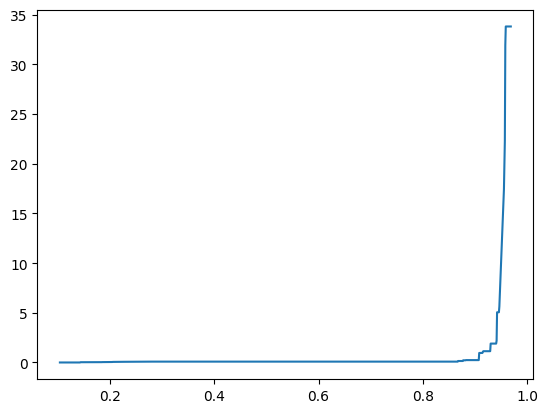

In [52]:
plt.plot(x_test_iso, phats, label='Isotonic Regression')

In [30]:
y_cal.shape

(10, 2302899)

In [31]:
X_cal.flatten().shape

(23028990,)

In [27]:
y_cal_iso.shape, y_test_iso.shape


((23028990,), (23028990,))

In [ ]:

y_cal_iso = y_cal_iso.reshape(y_cal.shape)

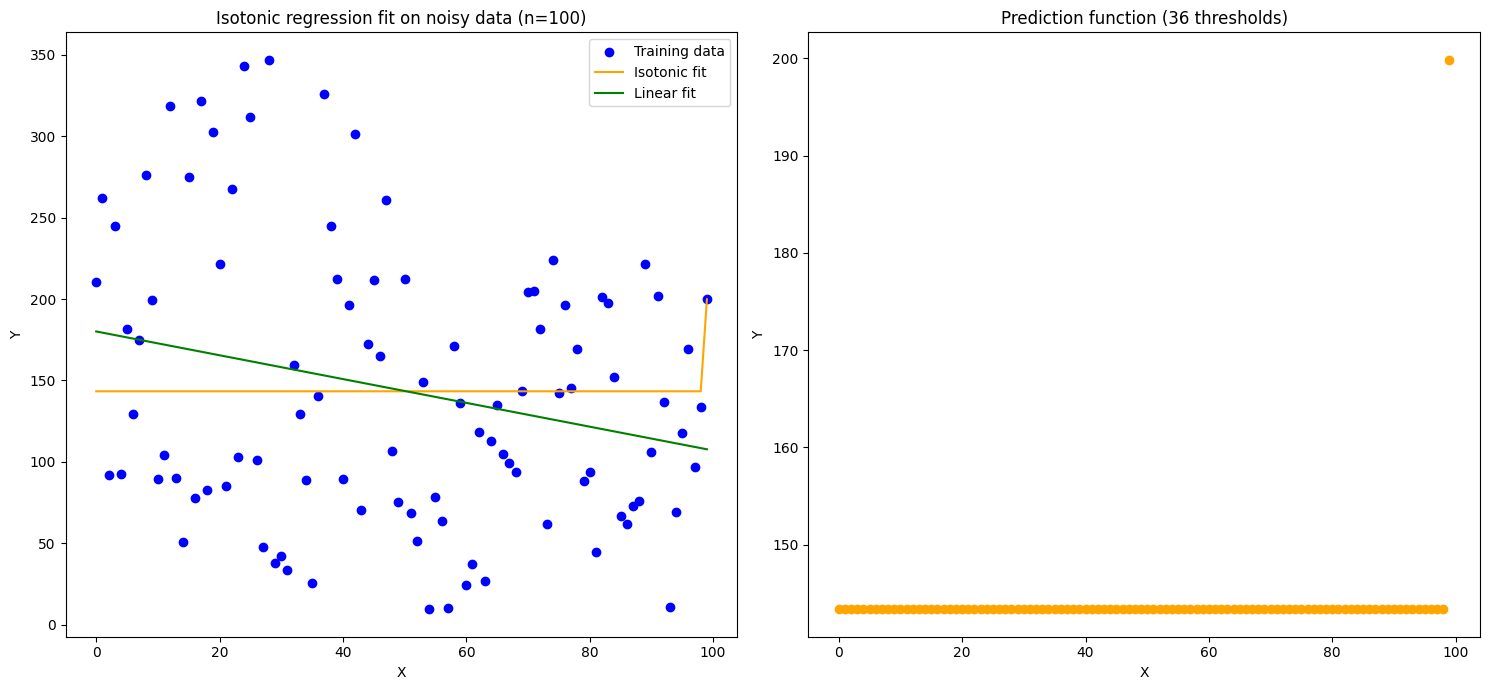

In [40]:
n = 100
x = np.arange(n)
y = np.random.rand(n) * 300
y[:50] *= 1.2
y[50:] *= 0.8

# Fit Isotonic Regression
ir = IsotonicRegression()
y_ir = ir.fit_transform(x, y)

# Linear fit for comparison
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x.reshape(-1, 1), y)
y_lr = lr.predict(x.reshape(-1, 1))

# Create a figure with 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Left plot: Isotonic regression fit on noisy data
ax[0].scatter(x, y, label='Training data', color='blue')
ax[0].plot(x, y_ir, label='Isotonic fit', color='orange')
ax[0].plot(x, y_lr, label='Linear fit', color='green')
ax[0].set_title('Isotonic regression fit on noisy data (n=100)')
ax[0].legend()

# Right plot: Prediction function
ax[1].scatter(x, y_ir, label='Isotonic fit', color='orange')
ax[1].set_title('Prediction function (36 thresholds)')

# Set common labels
for axis in ax:
    axis.set_xlabel('X')
    axis.set_ylabel('Y')

plt.tight_layout()
plt.show()

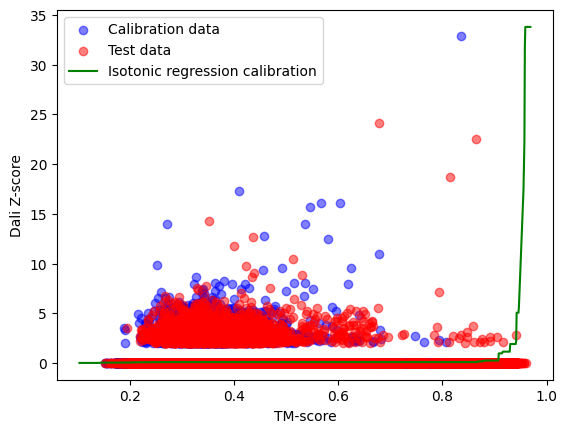

In [54]:
# plot isotonic regression results
# plt.figure(figsize=(10, 10))
# grab 10000 random samples for plotting

idx = np.random.choice(X_cal.flatten().shape[0], 100000)
# X_cal, y_cal = X_cal[idx], y_cal[idx]
# idx = np.random.choice(X_test.shape[0], 10000)
# X_test, y_test = X_test[idx], y_test[idx]
# y_cal_iso = y_cal_iso[idx]
# y_test_iso = y_test_iso[idx]

plt.scatter(X_cal.flatten()[idx], y_cal.flatten()[idx], color='blue', alpha=.5, label='Calibration data')
plt.scatter(X_test.flatten()[idx], y_test.flatten()[idx], color='red', alpha=.5, label='Test data')
# plt.scatter(X_cal.flatten()[idx], y_cal_iso[idx], color='blue', alpha=.5, label='Isotonic regression calibration', marker='s', s=50)
# plt.scatter(X_test.flatten()[idx], y_test_iso[idx], color='red', alpha=.5, label='Isotonic regression test', marker='s', s=50)
# plt.plot(X_cal.flatten()[idx], y_cal_iso[idx], color='blue', label='Isotonic regression calibration')
plt.plot(x_test_iso, phats, color='green', label='Isotonic regression calibration')
# plt.plot(X_test.flatten()[idx], y_test_iso[idx], color='red', label='Isotonic regression test')

# plt.scatter(X_cal.flatten()[idx], y_cal.flatten()[idx], color='blue', alpha=.5, label='Calibration data')
# plt.scatter(X_test.flatten()[idx], y_test.flatten()[idx], color='red', alpha=.5, label='Test data')
# plt.scatter(X_cal.flatten()[idx], y_cal_iso[idx], color='blue', alpha=.5, label='Isotonic regression calibration')
# plt.scatter(X_test.flatten()[idx], y_test_iso[idx], color='red', alpha=.5, label='Isotonic regression test')


plt.xlabel('TM-score')
plt.ylabel('Dali Z-score')
plt.legend()
plt.show()


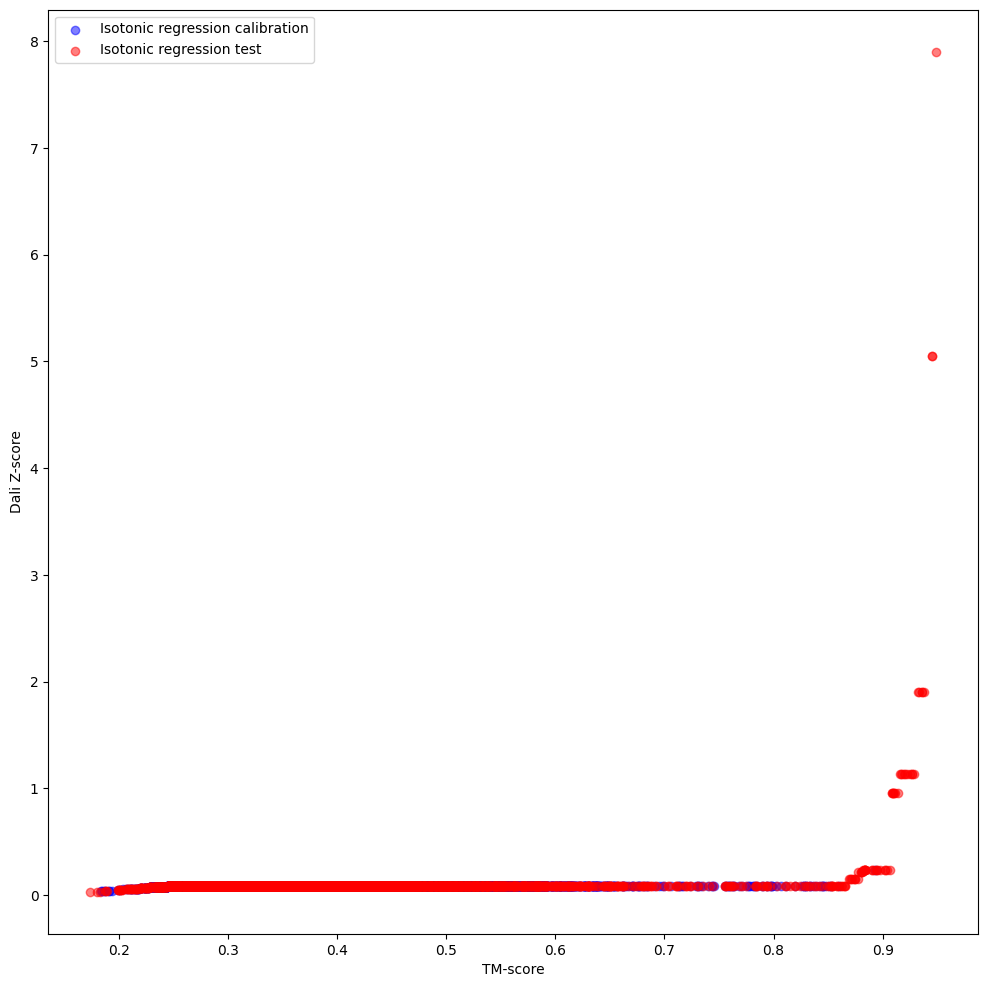

In [36]:
# Grab 1000 random samples for plotting
cal_sample_size = min(10000, X_cal.flatten().shape[0])
test_sample_size = min(10000, X_test.flatten().shape[0])

cal_idx = np.random.choice(X_cal.flatten().shape[0], cal_sample_size, replace=False)
test_idx = np.random.choice(X_test.flatten().shape[0], test_sample_size, replace=False)

# Plot isotonic regression results
plt.figure(figsize=(12, 12))

# Scatter plot for calibration data with transparency
plt.scatter(X_cal.flatten()[cal_idx], y_cal_iso[cal_idx], color='blue', alpha=0.5, label='Isotonic regression calibration')
# Scatter plot for test data with transparency
plt.scatter(X_test.flatten()[test_idx], y_test_iso[test_idx], color='red', alpha=0.5, label='Isotonic regression test')

# Set labels and legend
plt.xlabel('TM-score')
plt.ylabel('Dali Z-score')
plt.legend()
plt.show()

In [23]:
# Extract the first result
result = results[0]

# Ensure both Z_score and S_i are numpy arrays
z_scores = np.array(result['Z_score'])
s_i = np.array(result['S_i'])

In [24]:
results[0]['S_i']

array([0.9585886 , 0.9172157 , 0.91583586, ..., 0.1329757 , 0.13261065,
       0.13029015], dtype=float32)

In [25]:
results[0]['Z_score']

array([41.5, 33.2, 32.3, ...,  0. ,  0. ,  0. ], dtype=float32)

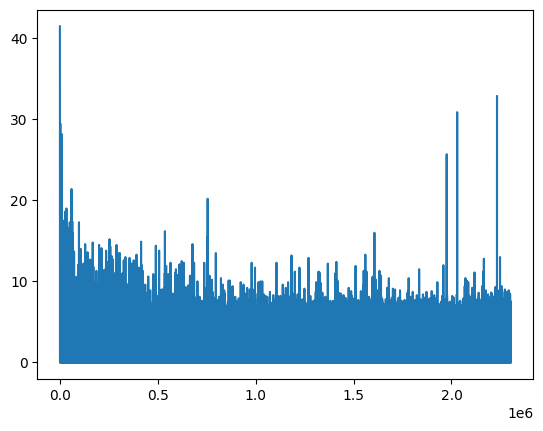

In [26]:
plt.plot(results[0]['Z_score'])

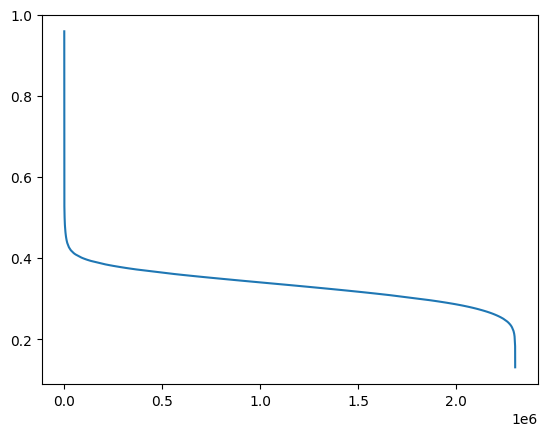

In [27]:
plt.plot(results[0]['S_i'])

In [28]:
results[0]['Z_score'][0:1000]

array([41.5, 33.2, 32.3, 26.8, 36.7, 38.1, 27.7, 25.2, 31.3, 22.6, 26.6,
       32.9, 24.8, 31.2, 30.9, 28.7, 24.9, 31.7, 32.9, 20.6, 24.1, 38. ,
       36.1, 33.9, 28.7, 27.2, 12.1, 39.1, 15.8, 18.4, 17.2, 34.1, 13.3,
       32.9, 27.3,  9.2,  9.8, 21.9, 32.6, 29.1, 11.3, 18.5, 14. , 25.4,
       30.9, 21.9, 17.2, 25.5, 17.6, 20.7, 24.5, 16.4, 31.5, 33.9, 24.3,
       18.3, 27. , 24. ,  6.2, 18.4, 19.8, 23.4, 22.4, 21.1, 15.3, 30.2,
        3.5, 11.8, 13.9, 19.4, 21.5, 15.7, 18.2, 23.2, 17. ,  8.6, 17. ,
       24.5, 14.5,  7.4, 12.2, 14.1, 14.1, 17.3, 11.9, 14.7, 18.8,  7.9,
       12.1,  8.2,  7.2, 13.3, 24.6, 10. ,  6.8, 20.3, 10.8, 10.7, 11.1,
       19.9, 24.8, 10.5,  8.3, 15.5, 12.7, 11.3, 21.1, 24.9, 14.7, 14.1,
       14.9,  9.1, 12.5, 12.8, 11.3, 14.5, 24.7, 13.8, 32. , 15.8, 12.1,
       15.9, 27.4, 13.2, 11.4, 12.4, 19.9, 10.2,  8.5, 15.9,  9.6,  8.9,
       20.1,  0. , 13.6, 16.5, 12.1,  8.8, 13.7, 21.1,  8.6, 15.1, 10.7,
       10.1, 11.8, 16. , 16.9, 10.1,  8.4, 18.6, 13

In [29]:
spearman_corr, p_value = spearmanr(z_scores, s_i)


In [30]:
spearman_corr, p_value

(0.0008161051457895789, 0.2155440504999531)

In [31]:
spearman_corr, p_value = spearmanr(z_scores[(z_scores != 0)], s_i[(z_scores != 0)])

In [32]:
spearman_corr, p_value

(-0.04839821160808072, 5.489618312244628e-90)

In [121]:
from scipy.stats import pearsonr

pearson_corr, p_value = pearsonr(z_scores, s_i)


In [122]:
pearson_corr, p_value

(0.02538192409260129, 0.0)

In [119]:
# correlation
print(np.corrcoef(results[0]['Z_score'], results[0]['S_i']))


[[1.         0.02538192]
 [0.02538192 1.        ]]


In [ ]:
spearman_corr, p_value

(0.0008161051457895789, 0.2155440504999531)

In [96]:
print(np.mean(s_i[z_scores ==0]))
print(np.mean(s_i[z_scores >0]))

NameError: name 's_i' is not defined

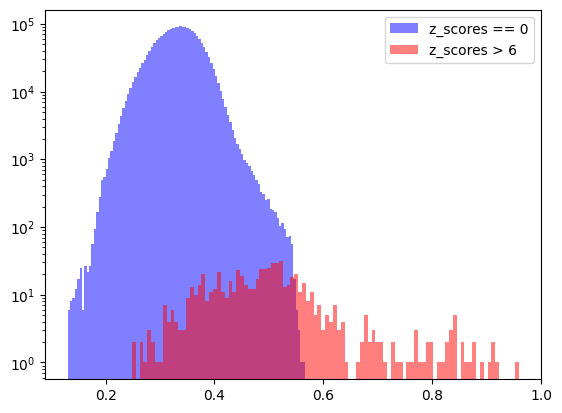

In [50]:
plt.hist(s_i[z_scores ==0], bins=100, color='blue', alpha=0.5, label='z_scores == 0')
plt.hist(s_i[z_scores >10], bins=100, color='red', alpha=0.5, label='z_scores > 6')
plt.yscale('log')
plt.legend()


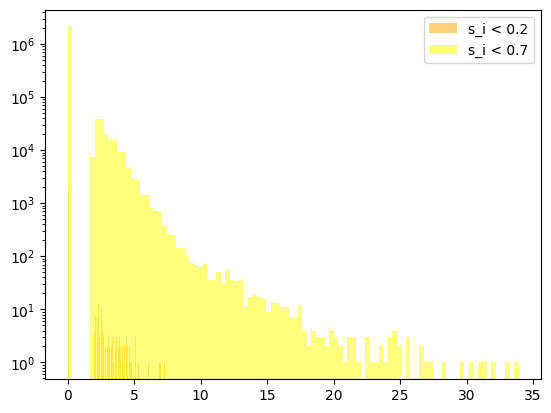

In [58]:
# plt.hist(z_scores[s_i < .3], bins=100, color='red', alpha=0.5, label='s_i < 0.3')
# plt.hist(z_scores[s_i < .5], bins=100, color='blue', alpha=0.5, label='s_i < 0.5')
plt.hist(z_scores[s_i < .2], bins=100, color='orange', alpha=0.5, label='s_i < 0.2')
plt.hist(z_scores[s_i < .7], bins=100, color='yellow', alpha=0.5, label='s_i < 0.7')
plt.yscale('log')
plt.legend()

Text(0.5, 1.0, 'Z-score vs S_i')

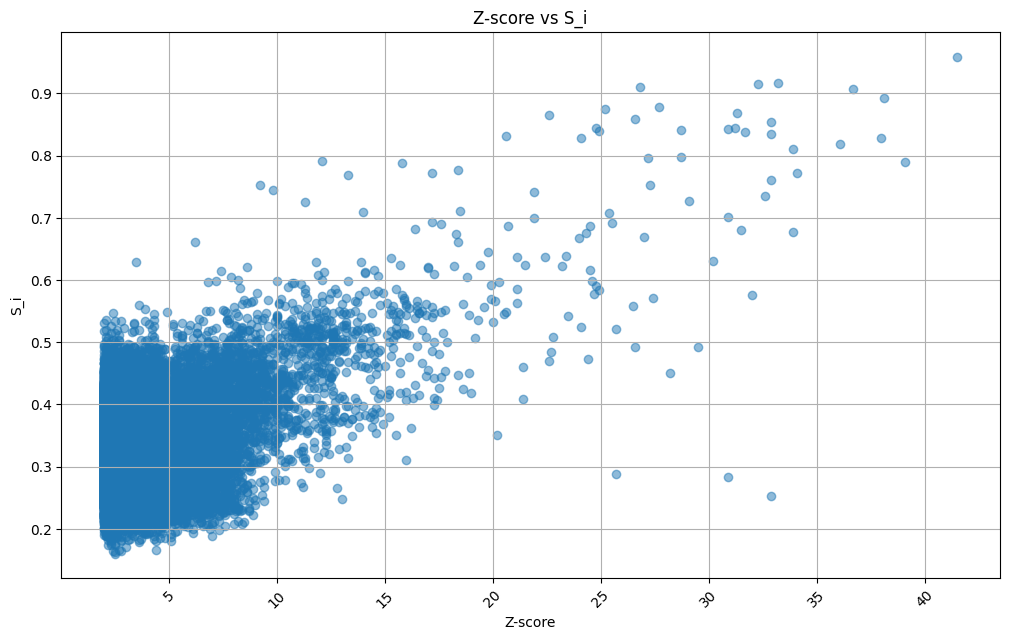

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(np.array(results[0]['Z_score'][results[0]['Z_score'] > 0]), np.array(results[0]['S_i'][results[0]['Z_score'] > 0]), alpha=0.5)
# plt.xticks([])  # Remove x-axis ticks to improve readability
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.xlabel('Z-score')
plt.ylabel('S_i')
plt.title('Z-score vs S_i')
# spearman correlation
# print(spearmanr(results[0]['Z_score'], results[0]['S_i']))

In [84]:
np.sort(results[0]['Z_score'])[::-1][0:100]

array([41.5, 39.1, 38.1, 38. , 36.7, 36.1, 34.1, 33.9, 33.9, 33.2, 32.9,
       32.9, 32.9, 32.9, 32.6, 32.3, 32. , 31.7, 31.5, 31.3, 31.2, 30.9,
       30.9, 30.9, 30.2, 29.5, 29.1, 28.7, 28.7, 28.2, 27.7, 27.4, 27.3,
       27.2, 27. , 26.8, 26.6, 26.6, 26.5, 25.7, 25.7, 25.5, 25.4, 25.2,
       24.9, 24.9, 24.8, 24.8, 24.7, 24.6, 24.5, 24.5, 24.4, 24.3, 24.1,
       24.1, 24. , 23.5, 23.4, 23.2, 22.8, 22.7, 22.6, 22.6, 22.4, 21.9,
       21.9, 21.5, 21.4, 21.4, 21.1, 21.1, 21.1, 20.7, 20.6, 20.6, 20.5,
       20.3, 20.2, 20.1, 20. , 19.9, 19.9, 19.8, 19.6, 19.4, 19.3, 19.2,
       19. , 18.9, 18.9, 18.8, 18.6, 18.6, 18.5, 18.4, 18.4, 18.4, 18.3,
       18.2], dtype=float32)

Text(0, 0.5, 'Z-score')

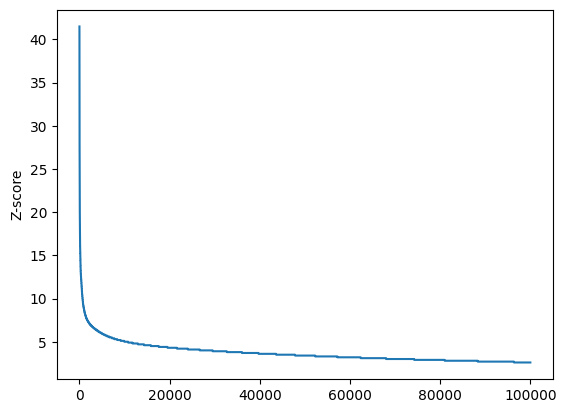

In [83]:
plt.plot(np.sort(results[0]['Z_score'])[::-1][0:100000])
plt.ylabel('Z-score')
# make this log scale
# plt.yscale('log')

In [95]:
sum(results[2]['Z_score'] > 6)

99

In [94]:
sum(results[2]['S_i'] < .4)

690275

In [93]:
sum(np.logical_and(results[2]['S_i'] < .4, results[2]['Z_score'] > 6))


20

In [ ]:
venn2([set(results[0]['Z_score'][results[0]['S_i'] < .3 and results[0]['Z_score'] > 0]), set(results[0]['meta'])], set_labels=('Dali', 'Model'))

(array([2.128576e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        7.572000e+03, 4.969000e+04, 4.098700e+04, 2.193900e+04,
        1.622600e+04, 1.199900e+04, 8.184000e+03, 5.051000e+03,
        3.044000e+03, 2.396000e+03, 1.288000e+03, 1.015000e+03,
        7.510000e+02, 4.990000e+02, 3.390000e+02, 2.300000e+02,
        2.030000e+02, 1.410000e+02, 9.800000e+01, 7.400000e+01,
        6.900000e+01, 6.400000e+01, 5.900000e+01, 4.800000e+01,
        4.700000e+01, 5.400000e+01, 4.700000e+01, 3.600000e+01,
        1.900000e+01, 2.700000e+01, 2.000000e+01, 1.600000e+01,
        1.300000e+01, 1.800000e+01, 1.600000e+01, 9.000000e+00,
        1.300000e+01, 1.200000e+01, 8.000000e+00, 2.000000e+00,
        7.000000e+00, 4.000000e+00, 3.000000e+00, 4.000000e+00,
        4.000000e+00, 4.000000e+00, 3.000000e+00, 3.000000e+00,
        2.000000e+00, 1.000000e+00, 4.000000e+00, 1.000000e+00,
        2.000000e+00, 1.000000e+00, 4.000000e+00, 6.000000e+00,
        3.000000e+00, 4.000000e+00, 0.00

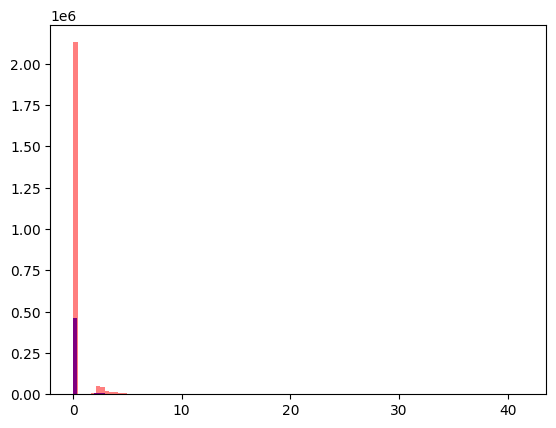

In [64]:
# plt.hist(results[0]['Z_score'], bins=100, color='blue', alpha=0.5, label='Z-score')
plt.hist(results[0]['Z_score'][results[0]['S_i'] < .3], bins=100, color='blue', alpha=1, label='Z-score < 0.2')
plt.hist(results[0]['Z_score'][results[0]['S_i'] >.2], bins=100, color='red', alpha=0.5, label='Z-score > 0.2')

Text(0.5, 1.0, 'Z-score vs S_i')

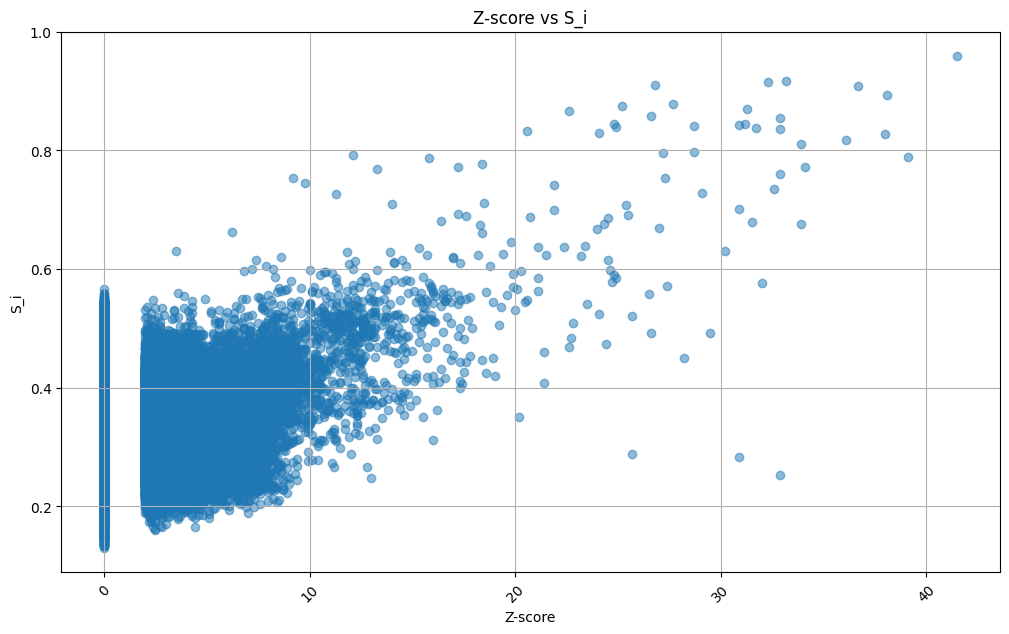

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(np.array(results[0]['Z_score']), np.array(results[0]['S_i']), alpha=0.5)
# plt.xticks([])  # Remove x-axis ticks to improve readability
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.xlabel('Z-score')
plt.ylabel('S_i')
plt.title('Z-score vs S_i')
# spearman correlation
# print(spearmanr(results[0]['Z_score'], results[0]['S_i']))

In [139]:
results[0]['meta'][0:5]

['A0A3D5UIR4', 'A0A847AZE0', 'A0A3S8VTL1', 'A0A5B5VW15', 'A0A7V7D4F0']

In [140]:
results[0]['metadata_dali'][0:5]

['A0A3D5UIR4', 'A0A832NLT4', 'A0A1G2CMQ2', 'E4UE10', 'A0A7V7D4F0']

In [1]:
# look at top 1000 DALI hits vs top 10000 retrieved protein vec hits
plt.figure(figsize=(8, 6))

set1 = set(results[0]['meta'][0:10000])
set2 = set(results[0]['metadata_dali'])
venn = venn2([set1, set2], ('Retrieved protein vec hits', 'DALI hits'))

# Adding colors and transparency
venn.get_label_by_id('10').set_text(len(set1 - set2))  # Only in set1
venn.get_label_by_id('01').set_text(len(set2 - set1))  # Only in set2
venn.get_label_by_id('11').set_text(len(set1 & set2))  # In both sets

# Adding colors to the circles
venn.get_patch_by_id('10').set_color('red')
venn.get_patch_by_id('10').set_alpha(0.5)
venn.get_patch_by_id('01').set_color('green')
venn.get_patch_by_id('01').set_alpha(0.5)
venn.get_patch_by_id('11').set_color('blue')
venn.get_patch_by_id('11').set_alpha(0.5)

# plt.title('Venn Diagram of Retrieved Protein Vec Hits and DALI Hits')
# plt.show()

NameError: name 'plt' is not defined

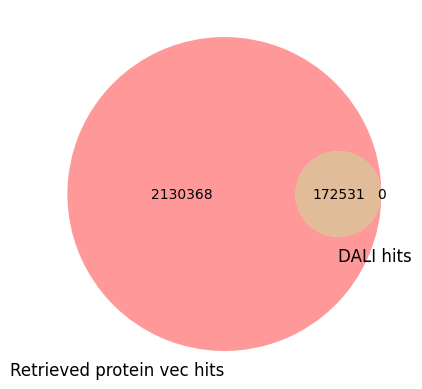

In [19]:
# make venn diagram of the intersection of the DALI results and the nearest neighbors, which would be metadata_test and dali_test['target']
venn2([set(metadata_test), set(dali_test['target'])], ('Retrieved protein vec hits', 'DALI hits'))
# set(dali_test[dali_test['Z'] > 10]['target'])


In [77]:
dali_test['Z'].describe()

count    172531.000000
mean          3.134578
std           1.322030
min           2.000000
25%           2.300000
50%           2.800000
75%           3.600000
max          41.500000
Name: Z, dtype: float64

In [20]:
# Create a dictionary where the keys are the elements of afdb_metadata and the values are their indices
afdb_metadata_dict = {value: index for index, value in enumerate(afdb_metadata)}

# Now use this dictionary to find the indices of the elements in dali_test['target']
metadata_test_target = [afdb_metadata_dict[x] for x in dali_test['target'] if x in afdb_metadata_dict]

In [21]:
lookup_dict_test = {value: index for index, value in enumerate(I[0])}

In [22]:
# dali_faiss_intersection = [lookup_dict_test[x] for x in metadata_test_target if x in lookup_dict_test]
dali_faiss_idcs = [lookup_dict_test[x] for x in metadata_test_target]

In [113]:
# KL divergence between the two distributions D[0][dali_faiss_idcs] and D[0]
from scipy.stats import entropy

# Ensure the distributions are normalized to represent probabilities
# dist1 = D[0][dali_faiss_idcs] / np.sum(D[0][dali_faiss_idcs])
# dist2 = D[0] / np.sum(D[0])

# # Calculate the KL divergence
# kl_divergence = entropy(dist1, dist2)

# Create a new array of zeros with the same shape as D[0]
full_dist1 = np.zeros_like(D[0])

# Place the values of D[0][dali_faiss_idcs] at the corresponding indices in the new array
full_dist1[dali_faiss_idcs] = D[0][dali_faiss_idcs]

# Now full_dist1 and D[0] have the same shape, and you can compute the KL divergence as before
dist1 = full_dist1 / np.sum(full_dist1)
dist2 = D[0] / np.sum(D[0])

kl_divergence = entropy(dist1, dist2)

In [23]:
print(np.mean(D[0][dali_faiss_idcs]), np.mean(D[0]))
print(np.std(D[0][dali_faiss_idcs]), np.std(D[0]))
print(np.min(D[0][dali_faiss_idcs]), np.min(D[0]))
print(np.max(D[0][dali_faiss_idcs]), np.max(D[0]))
print(np.median(D[0][dali_faiss_idcs]), np.median(D[0]))


0.33288264 0.33176088
0.044738337 0.041239277
0.16031328 0.13029015
0.9585886 0.9585886
0.33252382 0.33297122


Text(0.5, 1.0, 'protein-vec distance distribution of DALI hits vs all hits')

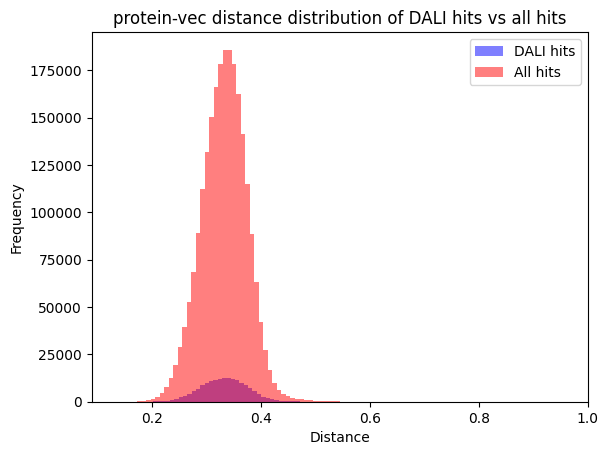

In [24]:
plt.hist(D[0][dali_faiss_idcs], bins=100, alpha=0.5, label='DALI hits', color='blue')
plt.hist(D[0], bins=100, alpha=0.5, label='All hits', color='red')
plt.legend()
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('protein-vec distance distribution of DALI hits vs all hits')

In [97]:
# index into afdb metadata with dali_test['target']
metadata_test_target = [afdb_metadata.index(x) for x in dali_test['target']]

KeyboardInterrupt: 

In [64]:
afdb_metadata.index(dali_test['target'][0])

1107878

## Scratch

In [ ]:
'>1oisA' in scope_metadata
# get location of 1oisA in scope
scope_idx = [i for i, x in enumerate(scope_metadata) if '>1oisA' in x][0]
print(scope_idx)

In [ ]:
# sort dali_test by Z score
dali_test_sorted = dali_test.sort_values('Z', ascending=False)

In [ ]:
scope_metadata[0]

'2hhvA'

In [ ]:
# get AFDB identifiers
metadata_test = [afdb_metadata[i] for i in I[0]]
print(len(metadata_test))

2302899
